# Disaster Data Analysis and Housing Assistance Evaluation

* This notebook analyzes FEMA disaster data alongside housing assistance information for renters and owners. The goal is to preprocess the data, merge relevant datasets, and extract insights about disaster impacts and assistance provided.

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure display options
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

%matplotlib inline

### Disaster Declarations Dataset

This dataset contains information about FEMA disaster declarations, including dates, types, and programs declared.

In [2]:
# Load the Disaster Declarations dataset
disaster = pd.read_csv('dataset/DisasterDeclarationsSummaries.csv', low_memory=False)

# Display the first 5 rows
disaster.head()

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,disasterCloseoutDate,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,incidentId,region,designatedIncidentTypes,lastRefresh,hash,id
0,FM-5530-NV,5530,NV,FM,2024-08-12T00:00:00.000Z,2024,Fire,GOLD RANCH FIRE,0,0,1,1,2024-08-11T00:00:00.000Z,NaN,NaN,0,32,31,99031,Washoe (County),24123,NaN,2024081201,9,R,2024-08-27T18:22:14.800Z,5d07e7c51bb300bfbec94a699a1e1ab1d61a97cd,f15a7a79-f1c3-41bb-8a5c-c05fbae34423
1,FM-5529-OR,5529,OR,FM,2024-08-09T00:00:00.000Z,2024,Fire,LEE FALLS FIRE,0,0,1,1,2024-08-08T00:00:00.000Z,NaN,NaN,0,41,67,99067,Washington (County),24122,NaN,2024081001,10,R,2024-08-27T18:22:14.800Z,ae87cf3c6ed795015b714af7166c7c295b2b67c7,09e3f81a-5e16-4b72-b317-1c64e0cfa59c
2,FM-5528-OR,5528,OR,FM,2024-08-06T00:00:00.000Z,2024,Fire,ELK LANE FIRE,0,0,1,1,2024-08-04T00:00:00.000Z,NaN,NaN,0,41,31,99031,Jefferson (County),24116,NaN,2024080701,10,R,2024-08-27T18:22:14.800Z,432cf0995c47e3895cea696ede5621b810460501,59983f89-30bf-4888-b21b-62e8d57d9aac
3,FM-5527-OR,5527,OR,FM,2024-08-02T00:00:00.000Z,2024,Fire,MILE MARKER 132 FIRE,0,0,1,1,2024-08-02T00:00:00.000Z,NaN,NaN,0,41,17,99017,Deschutes (County),24111,NaN,2024080301,10,R,2024-08-27T18:22:14.800Z,2f21d90cb6bc64b0d4121aa3f18d852bbb4b11fa,8d13ecf0-bc2f-496b-8c9f-b2e73da832a0
4,FM-5526-CO,5526,CO,FM,2024-08-01T00:00:00.000Z,2024,Fire,QUARRY FIRE,0,0,1,1,2024-07-30T00:00:00.000Z,NaN,NaN,0,8,59,99059,Jefferson (County),24106,NaN,2024080102,8,R,2024-08-27T18:22:14.800Z,e753ba692156f389dbe19f7a1c332d04ae145f74,17c24d4a-49a9-4cac-9322-e5427c4cdfeb


In [3]:
disaster.dtypes

femaDeclarationString       object
disasterNumber               int64
state                       object
declarationType             object
declarationDate             object
fyDeclared                   int64
incidentType                object
declarationTitle            object
ihProgramDeclared            int64
iaProgramDeclared            int64
paProgramDeclared            int64
hmProgramDeclared            int64
incidentBeginDate           object
incidentEndDate             object
disasterCloseoutDate        object
tribalRequest                int64
fipsStateCode                int64
fipsCountyCode               int64
placeCode                    int64
designatedArea              object
declarationRequestNumber     int64
lastIAFilingDate            object
incidentId                   int64
region                       int64
designatedIncidentTypes     object
lastRefresh                 object
hash                        object
id                          object
dtype: object

In [4]:
# Convert date columns to datetime
date_columns = ['declarationDate', 'incidentBeginDate', 'incidentEndDate', 'disasterCloseoutDate']
for col in date_columns:
    disaster[col] = pd.to_datetime(disaster[col], errors='coerce')

In [5]:
disaster.describe()

,disasterNumber,fyDeclared,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,declarationRequestNumber,incidentId,region
count,67353.000000,67353.000000,67353.000000,67353.000000,67353.000000,67353.000000,67353.000000,67353.000000,67353.000000,67353.000000,67353.000000,6.735300e+04,67353.000000
mean,2666.554571,2005.284085,0.169866,0.255178,0.933960,0.443202,0.002405,31.477202,97.212581,96439.197526,34483.980253,1.595714e+09,5.194646
std,1433.033272,15.018399,0.375518,0.435964,0.248354,0.496767,0.048985,16.674807,102.024986,13759.328290,34184.067795,1.263353e+09,2.128657
min,1.000000,1953.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,5.300300e+04,1.000000
25%,1361.000000,1998.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,31.000000,99029.000000,9016.000000,9.801200e+04,4.000000
50%,3142.000000,2008.000000,0.000000,0.000000,1.000000,0.000000,0.000000,30.000000,75.000000,99073.000000,20052.000000,2.008061e+09,5.000000
75%,3621.000000,2019.000000,0.000000,1.000000,1.000000,1.000000,0.000000,46.000000,127.000000,99123.000000,73030.000000,2.020031e+09,7.000000
max,5548.000000,2025.000000,1.000000,1.000000,1.000000,1.000000,1.000000,78.000000,840.000000,99507.000000,99159.000000,9.062400e+09,10.000000


#### ihProgramDeclared, iaProgramDeclared, paProgramDeclared, hmProgramDeclared:

These are binary indicators (0 or 1):
- ihProgramDeclared: Individual assistance for housing.
- iaProgramDeclared: Individual assistance programs.
- paProgramDeclared: Public assistance programs.
- hmProgramDeclared: Hazard mitigation programs.

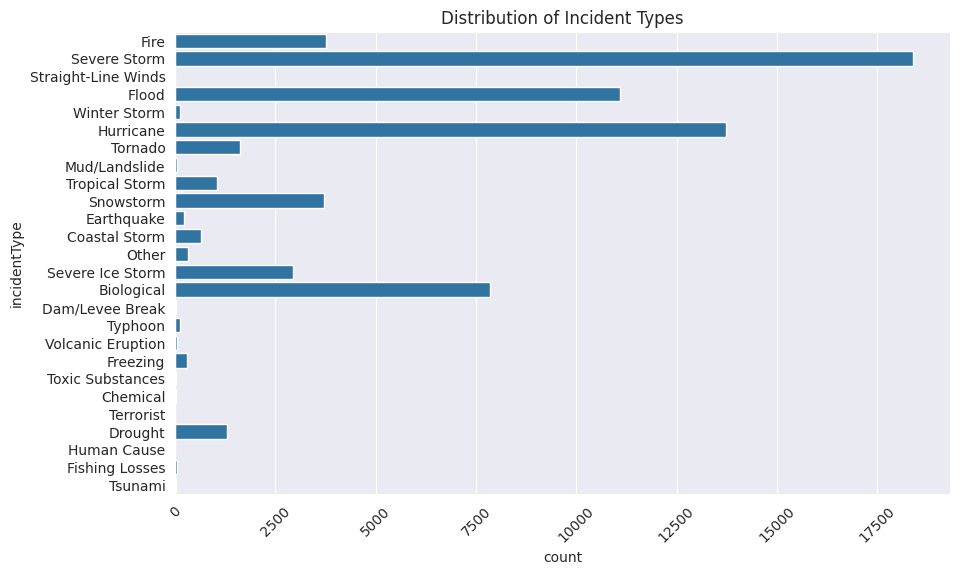

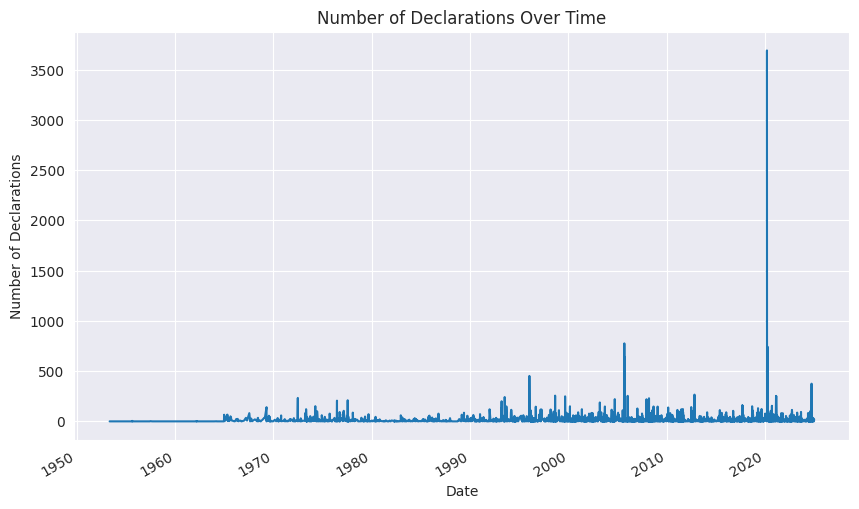

In [6]:
# Distribution of disaster types
plt.figure(figsize=(10, 6))
sns.countplot(disaster['incidentType'])
plt.title('Distribution of Incident Types')
plt.xticks(rotation=45)
plt.show()

# Time series analysis of declarations
plt.figure(figsize=(10, 6))
disaster['declarationDate'].value_counts().sort_index().plot()
plt.title('Number of Declarations Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Declarations')
plt.show()

* From the plot, we can see that 'Severe Storm' and 'Hurricane' are the most common incident types declared by FEMA.
  

In [7]:
unique_values = disaster["declarationType"].unique()
print(unique_values)
print(f"Number of unique values: {len(unique_values)}\n")

['FM' 'DR' 'EM']
Number of unique values: 3



Number of unique values: 3
- FMAG: Fire Management Assistance Grant
- DR: Disaster Declaration
- EM: Emergency Declaration

In [8]:
disaster = disaster.drop(columns = ['femaDeclarationString','hash','placeCode','lastRefresh'])

In [9]:
# Drop duplicates
disaster.drop_duplicates(subset=['disasterNumber'], inplace=True)

# Handle missing values
disaster['incidentEndDate'] = disaster['incidentEndDate'].fillna(disaster['incidentBeginDate'])


In [10]:
disaster = disaster.set_index('disasterNumber')
disaster = disaster[['state', 'declarationDate', 'fyDeclared', 'declarationType', 'incidentType', 'declarationTitle',
             'ihProgramDeclared', 'iaProgramDeclared', 'paProgramDeclared', 'hmProgramDeclared',
             'incidentBeginDate', 'incidentEndDate', 'disasterCloseoutDate']]
disaster.head()

,state,declarationDate,fyDeclared,declarationType,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,disasterCloseoutDate
disasterNumber,,,,,,,,,,,,,
5530,NV,2024-08-12 00:00:00+00:00,2024,FM,Fire,GOLD RANCH FIRE,0,0,1,1,2024-08-11 00:00:00+00:00,2024-08-11 00:00:00+00:00,NaT
5529,OR,2024-08-09 00:00:00+00:00,2024,FM,Fire,LEE FALLS FIRE,0,0,1,1,2024-08-08 00:00:00+00:00,2024-08-08 00:00:00+00:00,NaT
5528,OR,2024-08-06 00:00:00+00:00,2024,FM,Fire,ELK LANE FIRE,0,0,1,1,2024-08-04 00:00:00+00:00,2024-08-04 00:00:00+00:00,NaT
5527,OR,2024-08-02 00:00:00+00:00,2024,FM,Fire,MILE MARKER 132 FIRE,0,0,1,1,2024-08-02 00:00:00+00:00,2024-08-02 00:00:00+00:00,NaT
5526,CO,2024-08-01 00:00:00+00:00,2024,FM,Fire,QUARRY FIRE,0,0,1,1,2024-07-30 00:00:00+00:00,2024-07-30 00:00:00+00:00,NaT


In [11]:
print("summaries shape : "+str(disaster.shape))

summaries shape : (5018, 13)


In [12]:
disaster.isnull().sum()

state                      0
declarationDate            0
fyDeclared                 0
declarationType            0
incidentType               0
declarationTitle           0
ihProgramDeclared          0
iaProgramDeclared          0
paProgramDeclared          0
hmProgramDeclared          0
incidentBeginDate          0
incidentEndDate            0
disasterCloseoutDate    1049
dtype: int64

In [13]:
disaster = disaster[disaster['incidentEndDate'] >= disaster['incidentBeginDate']]


In [14]:
disaster['disasterLength'] = disaster['incidentEndDate'] - disaster['incidentBeginDate']
print(disaster.shape)


(5016, 14)


In [15]:
print(disaster.dtypes)

state                                object
declarationDate         datetime64[ns, UTC]
fyDeclared                            int64
declarationType                      object
incidentType                         object
declarationTitle                     object
ihProgramDeclared                     int64
iaProgramDeclared                     int64
paProgramDeclared                     int64
hmProgramDeclared                     int64
incidentBeginDate       datetime64[ns, UTC]
incidentEndDate         datetime64[ns, UTC]
disasterCloseoutDate    datetime64[ns, UTC]
disasterLength              timedelta64[ns]
dtype: object


In [16]:
disaster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5016 entries, 5530 to 1
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   state                 5016 non-null   object             
 1   declarationDate       5016 non-null   datetime64[ns, UTC]
 2   fyDeclared            5016 non-null   int64              
 3   declarationType       5016 non-null   object             
 4   incidentType          5016 non-null   object             
 5   declarationTitle      5016 non-null   object             
 6   ihProgramDeclared     5016 non-null   int64              
 7   iaProgramDeclared     5016 non-null   int64              
 8   paProgramDeclared     5016 non-null   int64              
 9   hmProgramDeclared     5016 non-null   int64              
 10  incidentBeginDate     5016 non-null   datetime64[ns, UTC]
 11  incidentEndDate       5016 non-null   datetime64[ns, UTC]
 12  disasterClo

In [17]:
disaster.describe()

,fyDeclared,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,disasterLength
count,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016
mean,2002.373405,0.049242,0.224880,0.911085,0.413876,52 days 16:47:04.880382775
std,16.925287,0.216395,0.417545,0.284650,0.492576,228 days 07:08:39.390153536
min,1953.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
25%,1994.000000,0.000000,0.000000,1.000000,0.000000,0 days 00:00:00
50%,2006.000000,0.000000,0.000000,1.000000,0.000000,4 days 00:00:00
75%,2016.000000,0.000000,0.000000,1.000000,1.000000,14 days 00:00:00
max,2025.000000,1.000000,1.000000,1.000000,1.000000,5117 days 00:00:00


In [18]:
# Save the disasterFrame to a CSV file
disaster.to_csv('dataset/preprocessed/DisasterSummariespreprocessed.csv', index=False)

# Renters Data Preprocessing
In this section, we'll preprocess the Housing Assistance for Renters dataset. 

In [19]:
renters = pd.read_csv('dataset/HousingAssistanceRenters.csv')

# Display the first few rows
renters.head()

/tmp/ipykernel_2653/265908700.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  renters = pd.read_csv('dataset/HousingAssistanceRenters.csv')


,disasterNumber,state,county,city,zipCode,validRegistrations,totalInspected,totalInspectedWithNoDamage,totalWithModerateDamage,totalWithMajorDamage,totalWithSubstantialDamage,approvedForFemaAssistance,totalApprovedIhpAmount,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,id
0,1439,TX,Harris (County),BEAUMONT,70005,1,0,1,0,0,0,0,0.00,0.0,0.0,0.00,0,0,0,0,6aea447b-b44b-45c5-855a-f80be2d81d14
1,1439,TX,Walker (County),MIDWAY,75852,1,1,1,0,0,0,0,0.00,0.0,0.0,0.00,0,0,0,0,69b3242f-620f-40de-9641-275d35930abe
2,1439,TX,Walker (County),TRINITY,75862,2,2,2,0,0,0,1,9636.77,0.0,846.0,8790.77,1,0,0,0,2de630ca-906b-4c38-aafd-071a2834f579
3,1439,TX,Jasper (County),JASPER,75951,36,35,36,0,0,0,10,13541.04,0.0,2886.0,10655.04,10,0,0,0,ddc29699-624a-431c-8881-591b8602a043
4,1439,TX,Harris (County),HOUSTON,77002,1,1,1,0,0,0,1,3855.80,0.0,0.0,3855.80,1,0,0,0,8e8e7ed6-ee14-4f61-b7db-4c5dde792ec1


In [20]:
# Check dimensions
print(f"Renters dataset dimensions: {renters.shape}")

renters.info()  # Data types and non-null counts
renters.describe() # Summary statistics

Renters dataset dimensions: (143865, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143865 entries, 0 to 143864
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   disasterNumber                143865 non-null  int64  
 1   state                         143865 non-null  object 
 2   county                        143865 non-null  object 
 3   city                          143859 non-null  object 
 4   zipCode                       143865 non-null  object 
 5   validRegistrations            143865 non-null  int64  
 6   totalInspected                143865 non-null  int64  
 7   totalInspectedWithNoDamage    143865 non-null  int64  
 8   totalWithModerateDamage       143865 non-null  int64  
 9   totalWithMajorDamage          143865 non-null  int64  
 10  totalWithSubstantialDamage    143865 non-null  int64  
 11  approvedForFemaAssistance     143865 non-null  int64  
 12  tot

,disasterNumber,validRegistrations,totalInspected,totalInspectedWithNoDamage,totalWithModerateDamage,totalWithMajorDamage,totalWithSubstantialDamage,approvedForFemaAssistance,totalApprovedIhpAmount,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants
count,143865.000000,143865.000000,143865.000000,143865.000000,143865.000000,143865.000000,143865.00000,143865.000000,1.438650e+05,143865.000000,1.438650e+05,1.438650e+05,143865.000000,143865.000000,143865.000000,143865.000000
mean,3720.037723,73.159434,37.787759,68.322142,4.007896,0.504591,0.17661,33.017516,9.660016e+04,87.959993,2.729450e+04,6.105239e+04,31.543621,1.318132,0.155764,3.444556
std,1298.928228,451.482624,257.481495,429.421515,43.285980,11.589305,7.38904,254.497317,1.723495e+06,3659.636378,7.169892e+05,7.634670e+05,218.889017,58.518079,11.727652,25.351126
min,1439.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1895.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,4480.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.00000,1.000000,1.808000e+03,0.000000,0.000000e+00,8.550300e+02,1.000000,0.000000,0.000000,0.000000
75%,4586.000000,10.000000,3.000000,9.000000,0.000000,0.000000,0.00000,4.000000,1.367548e+04,0.000000,1.062000e+03,9.148530e+03,4.000000,0.000000,0.000000,0.000000
max,9808.000000,30849.000000,15400.000000,30849.000000,5209.000000,2318.000000,1402.00000,23150.000000,2.865478e+08,756291.270000,1.157951e+08,1.294755e+08,11039.000000,10229.000000,2310.000000,2003.000000


In [21]:
renters.drop(columns=['state', 'county'], inplace=True)

In [22]:
renters = renters.rename(columns={'totalInspectedWithNoDamage': 'noFemaInspectedDamage'})

renters.repairReplaceAmount = renters.repairReplaceAmount.astype('float64')

# Remove rows with invalid zip codes
renters = renters[(renters['zipCode'] != 0) & (renters['zipCode'] != '00000')]
renters.dropna(subset=['zipCode'], inplace=True)

In [23]:
# Check for missing values
print("Missing values per column:")
print(renters.isnull().sum())

Missing values per column:
disasterNumber                  0
city                            6
zipCode                         0
validRegistrations              0
totalInspected                  0
noFemaInspectedDamage           0
totalWithModerateDamage         0
totalWithMajorDamage            0
totalWithSubstantialDamage      0
approvedForFemaAssistance       0
totalApprovedIhpAmount          0
repairReplaceAmount             0
rentalAmount                    0
otherNeedsAmount                0
approvedBetween1And10000        0
approvedBetween10001And25000    0
approvedBetween25001AndMax      0
totalMaxGrants                  0
id                              0
dtype: int64


In [24]:
# Set multi-index
renters.set_index(['disasterNumber', 'zipCode', 'city'], inplace=True)

In [25]:
renters.to_csv('dataset/preprocessed/HousingAssistanceRenterspreprocessed.csv', index=False)

# Owners Data Preprocessing
In this section, we'll preprocess the Housing Assistance for Owners dataset. 


In [26]:
owners = pd.read_csv('dataset/HousingAssistanceOwners.csv', low_memory=False)
owners.head()      # Display the first few rows

,disasterNumber,state,county,city,zipCode,validRegistrations,averageFemaInspectedDamage,totalInspected,totalDamage,noFemaInspectedDamage,femaInspectedDamageBetween1And10000,femaInspectedDamageBetween10001And20000,femaInspectedDamageBetween20001And30000,femaInspectedDamageGreaterThan30000,approvedForFemaAssistance,totalApprovedIhpAmount,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,id
0,1439,TX,Aransas (County),ARANSAS PASS,78335,4,1345.01,3,5380.02,0,3,0,0,0,3,5915.91,3573.02,970.0,1372.89,3,0,0,0,b376b9df-58b0-4013-9d25-5569db62fd9c
1,1439,TX,Aransas (County),ARANSAS PASS,78336,68,3082.82,63,209632.06,4,56,3,0,0,54,180717.57,131097.36,23946.0,25674.21,27,26,1,0,b6f016d6-6cba-4b02-a441-8c23b758a8c2
2,1439,TX,Aransas (County),FULTON,78358,20,4722.34,18,94446.72,0,17,1,0,0,17,94240.88,58754.70,6784.0,28702.18,3,11,3,0,5be60b98-ecfb-4428-be81-4beedd65a427
3,1439,TX,Aransas (County),FULTON,78381,1,2578.30,1,2578.30,0,1,0,0,0,1,3304.30,1407.96,726.0,1170.34,1,0,0,0,700fc628-f37d-4c97-9292-e60744ee9a22
4,1439,TX,Aransas (County),ROCKPORT,78331,1,0.00,0,0.00,0,0,0,0,0,0,0.00,0.00,0.0,0.00,0,0,0,0,e91976e2-a61b-494d-95de-5be399b192da


In [27]:
print(f"Owners dataset dimensions: {owners.shape}")       # Check dimensions
print(owners.info())          # Data types and non-null counts
owners.describe()     # Summary statistics

Owners dataset dimensions: (155217, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155217 entries, 0 to 155216
Data columns (total 24 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   disasterNumber                           155217 non-null  int64  
 1   state                                    155217 non-null  object 
 2   county                                   155217 non-null  object 
 3   city                                     155213 non-null  object 
 4   zipCode                                  155217 non-null  object 
 5   validRegistrations                       155217 non-null  int64  
 6   averageFemaInspectedDamage               155217 non-null  float64
 7   totalInspected                           155217 non-null  int64  
 8   totalDamage                              155217 non-null  float64
 9   noFemaInspectedDamage                    155217 non-null  int64

,disasterNumber,validRegistrations,averageFemaInspectedDamage,totalInspected,totalDamage,noFemaInspectedDamage,femaInspectedDamageBetween1And10000,femaInspectedDamageBetween10001And20000,femaInspectedDamageBetween20001And30000,femaInspectedDamageGreaterThan30000,approvedForFemaAssistance,totalApprovedIhpAmount,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants
count,155217.000000,155217.000000,1.552170e+05,155217.000000,1.552170e+05,155217.000000,155217.000000,155217.000000,155217.000000,155217.000000,155217.000000,1.552170e+05,1.552170e+05,1.552170e+05,1.552170e+05,155217.000000,155217.000000,155217.000000,155217.000000
mean,3333.028747,92.871625,2.738124e+03,49.573378,2.338653e+05,10.505383,33.903322,2.798154,1.108094,1.258425,43.742953,1.479061e+05,8.059676e+04,2.376973e+04,3.530904e+04,33.083535,6.482905,4.176514,0.615158
std,1406.107388,507.741722,2.710765e+05,277.155979,3.203492e+06,74.177805,187.906777,28.915168,18.244640,25.692564,290.847836,1.377448e+06,7.262592e+05,3.933583e+05,3.154308e+05,230.636548,80.185208,48.249886,12.522521
min,1439.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1668.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,4235.000000,2.000000,5.151600e+02,1.000000,1.982840e+03,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.875690e+03,5.437500e+02,0.000000e+00,2.188900e+02,1.000000,0.000000,0.000000,0.000000
75%,4569.000000,16.000000,1.868500e+03,10.000000,2.452591e+04,2.000000,7.000000,0.000000,0.000000,0.000000,6.000000,2.231432e+04,1.302964e+04,1.928000e+03,3.951190e+03,4.000000,1.000000,0.000000,0.000000
max,9808.000000,21165.000000,1.067610e+08,15366.000000,4.068097e+08,5859.000000,8946.000000,2056.000000,2613.000000,2895.000000,14150.000000,1.301360e+08,7.939736e+07,5.107398e+07,3.577402e+07,11554.000000,9204.000000,4954.000000,2299.000000


In [28]:
owners.drop(columns=['state', 'county'], inplace=True)
owners = owners[(owners['zipCode'] != 0) & (owners['zipCode'] != '00000')]
owners.dropna(subset=['zipCode'], inplace=True)

In [29]:
owners = owners.set_index(['disasterNumber','zipCode','city'])

In [30]:
owners.head()

validRegistrations  \
disasterNumber zipCode city                               
1439           78335   ARANSAS PASS                   4   
               78336   ARANSAS PASS                  68   
               78358   FULTON                        20   
               78381   FULTON                         1   
               78331   ROCKPORT                       1   

                                     averageFemaInspectedDamage  \
disasterNumber zipCode city                                       
1439           78335   ARANSAS PASS                     1345.01   
               78336   ARANSAS PASS                     3082.82   
               78358   FULTON                           4722.34   
               78381   FULTON                           2578.30   
               78331   ROCKPORT                            0.00   

                                     totalInspected  totalDamage  \
disasterNumber zipCode city                                        
1439           78335   ARANSAS PASS               3      5380.02   
               78336   ARANSAS PASS              63    209632.06   
               78358   FULTON                    18     94446.72   
               78381   FULTON                     1      2578.30   
               78331   ROCKPORT                   0         0.00   

                                     noFemaInspectedDamage  \
disasterNumber zipCode city                                  
1439           78335   ARANSAS PASS                      0   
               78336   ARANSAS PASS                      4   
               78358   FULTON                            0   
               78381   FULTON                            0   
               78331   ROCKPORT                          0   

                                     femaInspectedDamageBetween1And10000  \
disasterNumber zipCode city                                                
1439           78335   ARANSAS PASS                                    3   
               78336   ARANSAS PASS                                   56   
               78358   FULTON                                         17   
               78381   FULTON                                          1   
               78331   ROCKPORT                                        0   

                                     femaInspectedDamageBetween10001And20000  \
disasterNumber zipCode city                                                    
1439           78335   ARANSAS PASS                                        0   
               78336   ARANSAS PASS                                        3   
               78358   FULTON                                              1   
               78381   FULTON                                              0   
               78331   ROCKPORT                                            0   

                                     femaInspectedDamageBetween20001And30000  \
disasterNumber zipCode city                                                    
1439           78335   ARANSAS PASS                                        0   
               78336   ARANSAS PASS                                        0   
               78358   FULTON                                              0   
               78381   FULTON                                              0   
               78331   ROCKPORT                                            0   

                                     femaInspectedDamageGreaterThan30000  \
disasterNumber zipCode city                                                
1439           78335   ARANSAS PASS                                    0   
               78336   ARANSAS PASS                                    0   
               78358   FULTON                                          0   
               78381   FULTON                                          0   
               78331   ROCKPORT                                        0   

                                     approvedForFemaA

In [31]:
owners.to_csv('dataset/preprocessed/HousingAssistanceOwnerspreprocessed.csv', index=False)

# Merge Renters and Owners Data
In this section, we'll combine the preprocessed Renters and Owners datasets to create a comprehensive dataset of housing assistance.

Both the renters and owners datasets contain important information about housing assistance provided by FEMA. By combining them, we can analyze the total housing assistance across all affected individuals.

In [32]:
print(str(owners.shape) +'\t' + str(renters.shape))

# Combine renters and owners data
total_assistance = pd.concat([owners,renters]).groupby(['disasterNumber','zipCode','city']).sum().reset_index()
print(total_assistance.shape)
print(total_assistance.info())

(155089, 19)	(143725, 16)
(228194, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228194 entries, 0 to 228193
Data columns (total 25 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   disasterNumber                           228194 non-null  int64  
 1   zipCode                                  228194 non-null  object 
 2   city                                     228194 non-null  object 
 3   validRegistrations                       228194 non-null  int64  
 4   averageFemaInspectedDamage               228194 non-null  float64
 5   totalInspected                           228194 non-null  int64  
 6   totalDamage                              228194 non-null  float64
 7   noFemaInspectedDamage                    228194 non-null  int64  
 8   femaInspectedDamageBetween1And10000      228194 non-null  float64
 9   femaInspectedDamageBetween10001And20000  228194 non-null  float6

In [33]:
total_assistance.describe()

,disasterNumber,validRegistrations,averageFemaInspectedDamage,totalInspected,totalDamage,noFemaInspectedDamage,femaInspectedDamageBetween1And10000,femaInspectedDamageBetween10001And20000,femaInspectedDamageBetween20001And30000,femaInspectedDamageGreaterThan30000,approvedForFemaAssistance,totalApprovedIhpAmount,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,totalWithModerateDamage,totalWithMajorDamage,totalWithSubstantialDamage
count,228194.000000,228194.000000,2.281940e+05,228194.000000,2.281940e+05,228194.000000,228194.000000,228194.000000,228194.000000,228194.000000,228194.000000,2.281940e+05,2.281940e+05,2.281940e+05,2.281940e+05,228194.000000,228194.000000,228194.000000,228194.000000,228194.000000,228194.000000,228194.000000
mean,3658.596256,109.290696,1.862140e+03,57.542065,1.590740e+05,50.217179,23.060751,1.903280,0.753718,0.855978,50.568578,1.615057e+05,5.487691e+04,3.337584e+04,6.250679e+04,42.388884,5.240655,2.939039,2.590046,2.526758,0.318115,0.111344
std,1301.442507,614.354089,2.235996e+05,360.100194,2.661416e+06,362.893865,157.259807,24.080355,15.158991,21.307427,362.158941,2.234695e+06,6.058848e+05,8.396593e+05,7.752172e+05,280.596603,99.888940,45.645344,25.215771,34.605705,9.299889,5.884605
min,1439.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1894.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4339.000000,3.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.602000e+03,0.000000e+00,0.000000e+00,7.000000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4586.000000,18.000000,9.313825e+02,9.000000,5.516030e+03,6.000000,2.000000,0.000000,0.000000,0.000000,7.000000,2.613201e+04,2.796270e+03,2.008000e+03,9.000000e+03,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9808.000000,42337.000000,1.067610e+08,24818.000000,4.078167e+08,32008.000000,8976.000000,2057.000000,2614.000000,2902.000000,32034.000000,4.174597e+08,7.939736e+07,1.580568e+08,1.655833e+08,17232.000000,13655.000000,7275.000000,4306.000000,5215.000000,2321.000000,1404.000000


In [34]:
total_assistance = total_assistance.set_index(['disasterNumber','zipCode','city'])
print("shape of sum df for owner and renter payment disaster : " + str(total_assistance.shape) + '\n')


shape of sum df for owner and renter payment disaster : (228194, 22)



In [35]:
total_assistance.head()

validRegistrations  \
disasterNumber zipCode city                             
1439           70005   BEAUMONT                     1   
               75852   MIDWAY                       7   
               75862   TRINITY                      7   
               75931   BROOKELAND                   1   
               75951   JASPER                     256   

                                   averageFemaInspectedDamage  totalInspected  \
disasterNumber zipCode city                                                     
1439           70005   BEAUMONT                          0.00               0   
               75852   MIDWAY                        20100.42               7   
               75862   TRINITY                        8760.72               6   
               75931   BROOKELAND                     1703.64               1   
               75951   JASPER                          765.00             233   

                                   totalDamage  noFemaInspectedDamage  \
disasterNumber zipCode city                                             
1439           70005   BEAUMONT           0.00                      1   
               75852   MIDWAY        120602.52                      1   
               75862   TRINITY        43803.60                      2   
               75931   BROOKELAND      1703.64                      0   
               75951   JASPER        168300.70                     57   

                                   femaInspectedDamageBetween1And10000  \
disasterNumber zipCode city                                              
1439           70005   BEAUMONT                                    0.0   
               75852   MIDWAY                                      0.0   
               75862   TRINITY                                     1.0   
               75931   BROOKELAND                                  1.0   
               75951   JASPER                                    177.0   

                                   femaInspectedDamageBetween10001And20000  \
disasterNumber zipCode city                                                  
1439           70005   BEAUMONT                                        0.0   
               75852   MIDWAY                                          2.0   
               75862   TRINITY                                         3.0   
               75931   BROOKELAND                                      0.0   
               75951   JASPER                                          0.0   

                                   femaInspectedDamageBetween20001And30000  \
disasterNumber zipCode city                                                  
1439           70005   BEAUMONT                                        0.0   
               75852   MIDWAY                                          4.0   
               75862   TRINITY                                         0.0   
               75931   BROOKELAND                                      0.0   
               75951   JASPER                                          0.0   

                                   femaInspectedDamageGreaterThan30000  \
disasterNumber zipCode city                                              
1439           70005   BEAUMONT                                    0.0   
               75852   MIDWAY                                      0.0   
               75862   TRINITY                                     0.0   
               75931   BROOKELAND                                  0.0   
               75951   JASPER                                      0.0   

                                   approvedForFemaAssistance  \
disasterNumber zipCode city                                    
1439           70005   BEAUMONT                            0   
               75852   MIDWAY                              6   
               75862   TRINITY                             5   
               75931   BROOKELAND                          1   
               75951   JASPER          

In [36]:
total_assistance = total_assistance[~total_assistance.index.duplicated()]


In [37]:
print("shape of sum df for owner and renter payment disaster : " + str(total_assistance.shape) + '\n')

shape of sum df for owner and renter payment disaster : (228194, 22)



In [38]:
print("disaster summaries shape : "+str(disaster.shape)+"\n merged df shape : "+str(total_assistance.shape))
df = pd.merge(total_assistance.reset_index(), disaster.drop(columns = 'state').reset_index(), on = 'disasterNumber')
print("\n final df shape : "+str(df.shape))

for key, group_df in df.groupby('incidentType'):
    print("after merge, the group of type '{}' has {} rows".format(key,len(group_df)))
    
print(df.isna().sum())
print(df.describe())

disaster summaries shape : (5016, 14)
 merged df shape : (228194, 22)

 final df shape : (228159, 38)
after merge, the group of type 'Biological' has 38605 rows
after merge, the group of type 'Dam/Levee Break' has 151 rows
after merge, the group of type 'Earthquake' has 1035 rows
after merge, the group of type 'Fire' has 5933 rows
after merge, the group of type 'Flood' has 20937 rows
after merge, the group of type 'Hurricane' has 93707 rows
after merge, the group of type 'Mud/Landslide' has 40 rows
after merge, the group of type 'Other' has 17 rows
after merge, the group of type 'Severe Ice Storm' has 4839 rows
after merge, the group of type 'Severe Storm' has 53897 rows
after merge, the group of type 'Tornado' has 2331 rows
after merge, the group of type 'Tropical Storm' has 3229 rows
after merge, the group of type 'Typhoon' has 3340 rows
after merge, the group of type 'Volcanic Eruption' has 48 rows
after merge, the group of type 'Winter Storm' has 50 rows
disasterNumber             

In [39]:
relevant_cols = ['validRegistrations',
       'averageFemaInspectedDamage', 'totalInspected', 'totalDamage',
       'noFemaInspectedDamage', 'femaInspectedDamageBetween1And10000',
       'femaInspectedDamageBetween10001And20000',
       'femaInspectedDamageBetween20001And30000',
       'femaInspectedDamageGreaterThan30000', 'approvedForFemaAssistance',
       'totalApprovedIhpAmount', 'repairReplaceAmount', 'rentalAmount',
       'otherNeedsAmount', 'approvedBetween1And10000',
       'approvedBetween10001And25000', 'approvedBetween25001AndMax',
       'totalMaxGrants','disasterLength']
df[relevant_cols].describe()

,validRegistrations,averageFemaInspectedDamage,totalInspected,totalDamage,noFemaInspectedDamage,femaInspectedDamageBetween1And10000,femaInspectedDamageBetween10001And20000,femaInspectedDamageBetween20001And30000,femaInspectedDamageGreaterThan30000,approvedForFemaAssistance,totalApprovedIhpAmount,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,disasterLength
count,228159.000000,2.281590e+05,228159.000000,2.281590e+05,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,2.281590e+05,2.281590e+05,2.281590e+05,2.281590e+05,228159.000000,228159.000000,228159.00000,228159.000000,228159
mean,109.307259,1.862426e+03,57.550892,1.590984e+05,50.224756,23.064289,1.903572,0.753834,0.856109,50.576335,1.615305e+05,5.488533e+04,3.338096e+04,6.251638e+04,42.395387,5.241459,2.93949,2.590444,226 days 09:33:09.365311032
std,614.399753,2.236167e+05,360.127108,2.661619e+06,362.921182,157.271609,24.082190,15.160151,21.309059,362.186176,2.234865e+06,6.059309e+05,8.397236e+05,7.752763e+05,280.617633,99.896581,45.64883,25.217685,443 days 05:20:00.595073400
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0 days 00:00:00
25%,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,9 days 00:00:00
50%,3.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.602930e+03,0.000000e+00,0.000000e+00,7.000000e+02,1.000000,0.000000,0.00000,0.000000,26 days 00:00:00
75%,18.000000,9.317350e+02,9.000000,5.519990e+03,6.000000,2.000000,0.000000,0.000000,0.000000,7.000000,2.614403e+04,2.799125e+03,2.008000e+03,9.000000e+03,6.000000,1.000000,0.00000,0.000000,59 days 00:00:00
max,42337.000000,1.067610e+08,24818.000000,4.078167e+08,32008.000000,8976.000000,2057.000000,2614.000000,2902.000000,32034.000000,4.174597e+08,7.939736e+07,1.580568e+08,1.655833e+08,17232.000000,13655.000000,7275.00000,4306.000000,1207 days 00:00:00


In [40]:
df[relevant_cols].isnull().sum()

validRegistrations                         0
averageFemaInspectedDamage                 0
totalInspected                             0
totalDamage                                0
noFemaInspectedDamage                      0
femaInspectedDamageBetween1And10000        0
femaInspectedDamageBetween10001And20000    0
femaInspectedDamageBetween20001And30000    0
femaInspectedDamageGreaterThan30000        0
approvedForFemaAssistance                  0
totalApprovedIhpAmount                     0
repairReplaceAmount                        0
rentalAmount                               0
otherNeedsAmount                           0
approvedBetween1And10000                   0
approvedBetween10001And25000               0
approvedBetween25001AndMax                 0
totalMaxGrants                             0
disasterLength                             0
dtype: int64

In [41]:
df_reset = df.reset_index(drop=True)
zip_counts = df_reset.groupby('disasterNumber').agg({
    'zipCode': 'nunique',
    'totalDamage': 'sum',
    'validRegistrations': 'sum',
    'totalInspected': 'sum',
    'approvedForFemaAssistance': 'sum',
    'disasterLength': 'max'
    
}).rename(columns={'zipCode': 'zip_counts'})

print(zip_counts.head())

                zip_counts  totalDamage  validRegistrations  totalInspected  \
disasterNumber                                                                
1439                   320  43195345.95               26224           23578   
1440                    23    725363.65                 374             358   
1441                    79   8686327.88                1259             674   
1442                    68  13802600.00                1148             749   
1443                    20   2698015.06                1218             886   

                approvedForFemaAssistance disasterLength  
disasterNumber                                            
1439                                19205        22 days  
1440                                  272         7 days  
1441                                  400         3 days  
1442                                  523         7 days  
1443                                  542         1 days  


In [42]:
zip_counts.to_csv('dataset/preprocessed/zipcounts.csv', index = ['disasterNumber'])

In [43]:
# Save this df so we can use it later in different notebooks.
df.to_csv('dataset/preprocessed/FEMA.csv',index = ['disasterNumber','zipCode','city'])

In this notebook, we:

- Preprocessed and cleaned the FEMA disaster declarations, renters, and owners datasets.
- Combined renters and owners data to form a comprehensive housing assistance dataset.
- Merged the housing assistance data with disaster declarations to associate assistance with specific disasters.
- Performed exploratory data analysis to understand the distribution and trends of assistance provided.
- Visualized key findings using various plots.
- Prepared a final dataset for future analysis or modeling.

This analysis provides insights into how FEMA's housing assistance is distributed across different disaster types, times, and locations.